### EJERCICIO AVANZADO

El fichero hr_train.cvs contiene una tabla sobre los empleados de una empresa. Entre otros incluye informacion de su nivel de satisfaccion, de la ultima evaluacion obtenida, del numero de proyecto en el que se encuentra, del numero medio de horas por semana, del numero de años que lleva en la compañia, si ha tenido o no un accidente en el trabajo, si se ha ido (left) de la compañia, si ha tenido una promocion en los ultimos 5 años, y por ultimo su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...)

El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente. 

Notas:
- La columna "left" indica si alguien se ha ido de la compañia, es la "y" del problema y el objetivo de la prediccion.
- Las columnas "sales" y "salary" son alfanumericas. La mayoria de clasificadores (aunque no todos) no trabajn bien con este tipo de variables y requieren valores numericos. Dado el caso dispones de diferentes alternativas: (1) eliminar esas columnas y trabajar con el resto o (2) traducir esas columnas en columnas binarias - por ejemplo si "salary" tiene tres valores eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para "sales", donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy tipico.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file1=r'hr_train.csv'

ci=pd.read_csv(file1)
ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [3]:
ci.left.value_counts()

0    7424
1    3075
Name: left, dtype: int64

In [4]:
ci.salary.value_counts()

low       5104
medium    4515
high       880
Name: salary, dtype: int64

In [5]:
ci.sales.value_counts()

sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: sales, dtype: int64

In [6]:
print(ci['sales'].unique())

['sales' 'technical' 'product_mng' 'marketing' 'IT' 'RandD' 'hr'
 'accounting' 'support' 'management']


# De valores alfanumericos a valores numericos
Despues de analizar la forma en la que están distribuidos los datos. Llegué a la conclucion de que los valores alfanumericos correspondientes a las columnas sales y salary, deben ser cambiados a valores numericos 

In [7]:
mapeo_sales = {
    'sales': 1,
    'technical': 2,
    'product_mng': 3,
    'marketing': 4,
    'IT': 5,
    'RandD': 6,
    'hr': 7,
    'accounting': 8,
    'support': 9,
    'management': 10
}

ci['sales'] = ci['sales'].map(mapeo_sales)

ci.sales.value_counts()

1     2935
2     1890
9     1556
5      825
3      639
4      614
7      532
6      530
8      527
10     451
Name: sales, dtype: int64

In [8]:
print(ci['salary'].unique())

['medium' 'high' 'low']


In [9]:
mapeo_salary = {
    'medium': 3,
    'high': 2,
    'low': 1
}

ci['salary'] = ci['salary'].map(mapeo_salary)
ci.salary.value_counts()

1    5104
3    4515
2     880
Name: salary, dtype: int64

In [10]:
ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,1,3
1,0.66,0.77,2,171,2,0,0,0,2,3
2,0.55,0.49,5,240,3,0,0,0,2,2
3,0.22,0.88,4,213,3,1,0,0,2,3
4,0.20,0.72,6,224,4,0,1,0,2,3


# Correlacion entre las diferentes columnas 
Se hace un mapa de correlacion para identificar que nivel de relacion tiene cada columna e identificar cual columna es prioritaria par identificar el riesgo de perdida de un trabajador 

<function matplotlib.pyplot.show(close=None, block=None)>

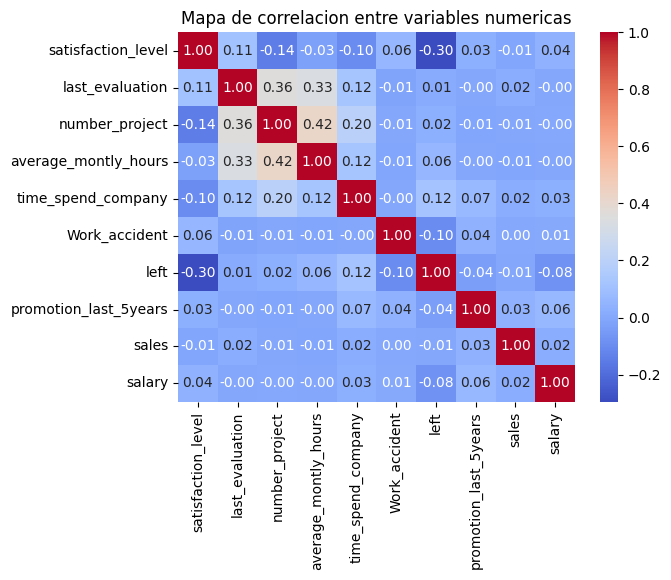

In [11]:
plt.Figure(figsize=(10,8))
sns.heatmap(ci.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de correlacion entre variables numericas')
plt.show

Se puede observar como la columna left tiene una relacion notable con la columna satisfaction_level, y aunque no mantiene la misma correlacion tambien se puede destacar las columnas work_accident y time_spend_company  

In [12]:
x = ci.drop('left', axis=1)
y = ci['left']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42) 

# Modelo Random Forest
Se seleccionó el modelo Random Forest debido a que el conjunto de datos presenta múltiples variables con relaciones complejas y no lineales. Además, este modelo tiene datos desbalanceados.   

In [17]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

print("Presicion:", accuracy_score(y_test, y_pred))
print("\nClasificacion: \n", classification_report(y_test, y_pred))

Presicion: 0.8638095238095238

Clasificacion: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.90      1436
           1       0.86      0.68      0.76       664

    accuracy                           0.86      2100
   macro avg       0.86      0.82      0.83      2100
weighted avg       0.86      0.86      0.86      2100



El modelo tiene una precision general del 86%, lo cual significa que mantiene un rendimiento bueno, pero hay un desbalance notorio en el rendimiento de las clases. La precision para la clase 0 (trabajadores que no dejan la empresa) es del 87%, y para la clase 1 (trabajadores que se van) es del 86%. Sin embargo, la recall para clase 1 es baja, lo que quiere decir que el modelo acertó el 68% de ellos, mientras que el 32% restante fue mal clasificado     

In [16]:
importacia = modelo.feature_importances_
importacia_ci = pd.DataFrame({
    'Caracteristica': x.columns,
    'Importancia': importacia
})

importacia_ci = importacia_ci.sort_values(by= 'Importancia', ascending=False)
print(importacia_ci)

          Caracteristica  Importancia
0     satisfaction_level     0.290727
3   average_montly_hours     0.203856
1        last_evaluation     0.151008
2         number_project     0.135098
4     time_spend_company     0.122073
7                  sales     0.058149
8                 salary     0.023448
5          Work_accident     0.011943
6  promotion_last_5years     0.003697


Se verifica que las variables con mayor influencia en la decisión de un trabajador de abandonar o permanecer en la empresa son el nivel de satisfacción registrado, el promedio de horas trabajadas al mes, la última evaluación de desempeño, el número de proyectos realizados y el tiempo que ha permanecido en la empresa. Estas características resultan ser determinantes al momento de predecir el comportamiento laboral del personal.

In [29]:
columnas_importantes = [
    'satisfaction_level',
    'average_montly_hours',
    'average_montly_hours',
    'last_evaluation',
    'number_project',
    'time_spend_company'
]
x_filtrado = x[columnas_importantes]

Se toma la decision de desarrollar un segundo modelo con solamente las columnas necesarias  

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_filtrado, y, test_size=0.3, random_state=42)

In [31]:
modelo = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
y_pred = modelo.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2164
           1       0.86      0.68      0.76       986

    accuracy                           0.87      3150
   macro avg       0.87      0.82      0.83      3150
weighted avg       0.87      0.87      0.86      3150



El segundo modelo tiene una ligera mejora en precision y recall, lo que significa que es ligeramente mejor en general, especialmente al considerar el desbalance de clases, sin embargo, ambos modelos tienen el mismo F1-score